# Objetivo: Criação de um modelo de ML utilizando Regressão Linear demonstrando os impactos na váriavel dependente (consumo de cerveja)

## Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bibliotecas adicionais

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importando dados

In [23]:
# -> Usually, I use sep = ',', nevertheless in this .csv file there are commas despite that ';'. 
# -> Then, reading the pandas docs and others DS' projects, sep= indentify automatically the separat
# -> 

dt = pd.read_excel('Consumo_cerveja.xlsx') # -> Read the .csv file.


columns = {
    "Data": "Data",
    "Temperatura Media (C)" : "Avg_Temp",
    "Temperatura Minima (C)" : "Min_Temp",
    "Temperatura Maxima (C)" : "Max_Temp",
    "Precipitacao (mm)": "Precipitacao",
    "Final de Semana" : "Weekend",
    "Consumo de cerveja (litros)" : "Beer_comsuption"
}

dt_1 = dt.rename(columns = columns)


df = dt_1.dropna(axis = 0) # -> removendo as linhas com Nan

df.head()

,Data,Avg_Temp,Min_Temp,Max_Temp,Precipitacao,Weekend,Beer_comsuption
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900


In [63]:
df.describe()

,Avg_Temp,Min_Temp,Max_Temp,Precipitacao,Weekend,Beer_comsuption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


<AxesSubplot:>

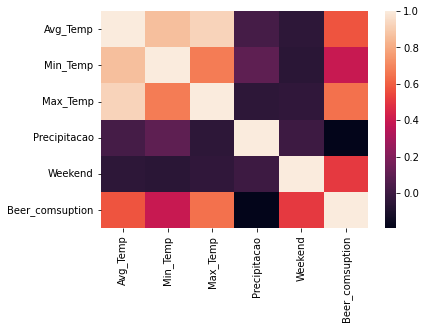

In [25]:
corr = df.corr().round(4)
sns.heatmap(corr, fmt = '.2g')

##### Percebe-se que o tempo médio tem correlação com a temperatura mínima e máxima

# -------------------------------------------------------------------------------------------------------------

# Análise gráfica

## Variável dependente (Y) = Consumo

### Consumo de cerveja ao longo do período

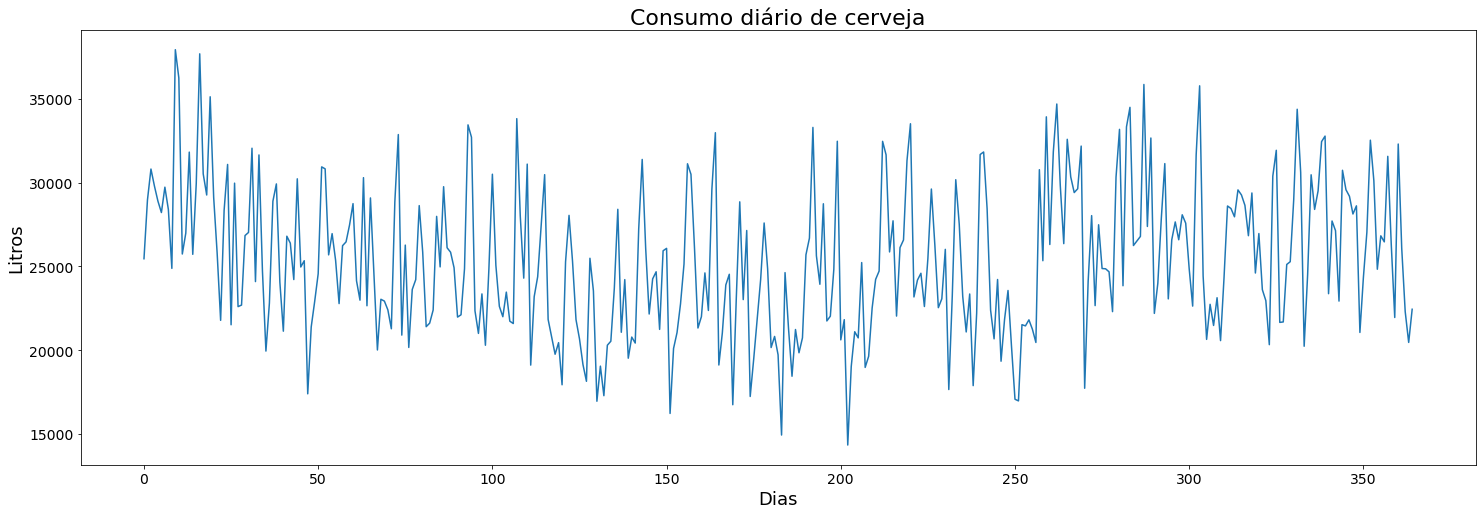

In [27]:
figure, ax = plt.subplots(figsize= (25, 8))

ax.set_title('Consumo diário de cerveja', fontsize = 22)
ax.set_ylabel('Litros', fontsize = 18)
ax.set_xlabel('Dias', fontsize= 18)
ax = df['Beer_comsuption'].plot(fontsize = 14)

### Consumo de cerveja em relação ao fim de semana

<AxesSubplot:title={'center':'Consumo de cerveja'}, xlabel='Final de semana', ylabel='Litros'>

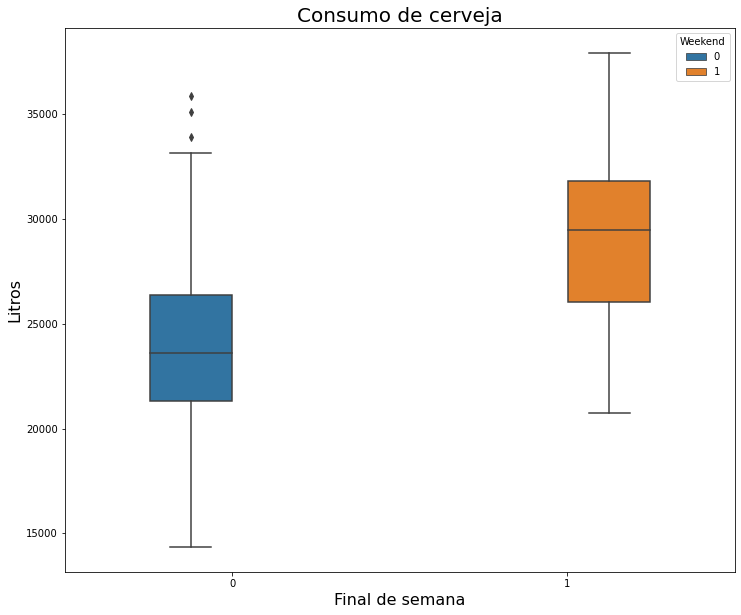

In [65]:
ax_plot = sns.boxplot(y = df['Beer_comsuption'], 
                      x = df['Weekend'], 
                      data = df, 
                      orient = 'v', 
                      width= 0.5, hue = 'Weekend')
ax_plot.figure.set_size_inches(12, 10)
ax_plot.set_title('Consumo de cerveja', fontsize= 20)
ax_plot.set_ylabel('Litros', fontsize= 16)
ax_plot.set_xlabel('Final de semana', fontsize= 16)
ax_plot

#### Analisando o boxplot por semana, percebeu-se que o consumo de cerveja nos finais de semana (1) é maior comparado aos dias da semana.
#### Os outliers no dia da semana podem ser interpretados como dias pertos de feriados prolongados.

### Dispersão entre variáveis

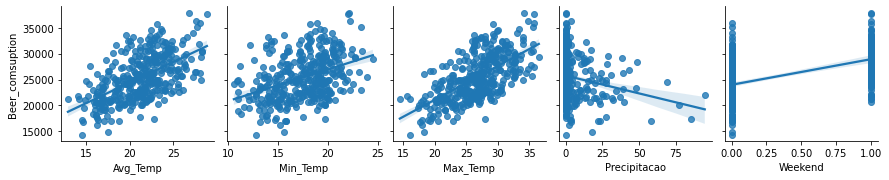

In [78]:
ax_pairplot = sns.pairplot(df, 
                           y_vars = df.columns[-1], 
                           x_vars = df.columns[1:-1], 
                           kind = 'reg'
                          )

In [79]:

df.columns

Index(['Data', 'Avg_Temp', 'Min_Temp', 'Max_Temp', 'Precipitacao', 'Weekend',
       'Beer_comsuption'],
      dtype='object')

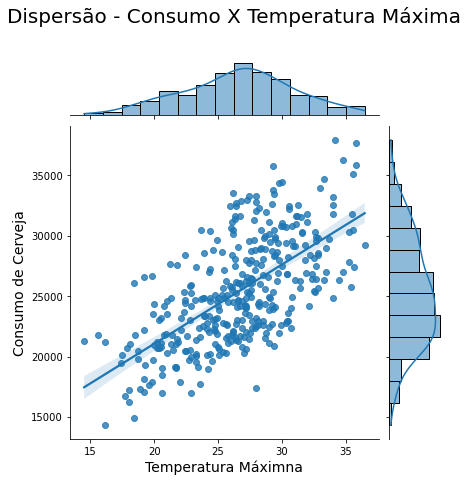

In [88]:
ax_temp_max = sns.jointplot(x= 'Max_Temp',
                            y= 'Beer_comsuption',
                            data= df,
                            kind= 'reg')

ax_temp_max.fig.suptitle('Dispersão - Consumo X Temperatura Máxima ', 
                         fontsize = 20,
                         y= 1.1)

ax_temp_max.set_axis_labels("Temperatura Máximna",
                            "Consumo de Cerveja",
                            fontsize= 14)

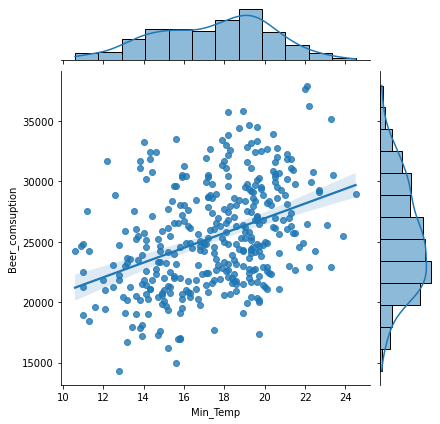

In [89]:
ax_temp_min = sns.jointplot(x= 'Min_Temp',
                            y= 'Beer_comsuption',
                            data= df,
                            kind= 'reg')

ax_temp_max.fig.suptitle('Dispersão - Consumo X Temperatura Mínima ', 
                         fontsize = 20,
                         y= 1.1)

ax_temp_max.set_axis_labels("Temperatura Máxima",
                            "Consumo de Cerveja",
                            fontsize= 14)


## Regressão Linear

In [130]:
y = df['Beer_comsuption'] ### -> Variável dependente
X = df[
    ['Avg_Temp', 
     'Min_Temp', 
     'Max_Temp', 
     'Precipitacao', 
     'Weekend']
    ] ### -> Variáveis independentes

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.3,
                                                    random_state = 2811) ### -> Variáveis de treino e de teste

In [132]:
print(f" Shape | X Train: {X_train.shape} \n Shape | X Test: {X_test.shape} \n Shape | y train: {y_train.shape[0]} \n Shape | y test {y_test.shape[0]}")

 Shape | X Train: (255, 5) 
 Shape | X Test: (110, 5) 
 Shape | y train: 255 
 Shape | y test 110


In [137]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_forecast = model.predict(X_test)

### R² do modelo de treino 

In [136]:
print(f" R²: {model.score(X_train, y_train).round(3)}")

 R²: 0.735


### R² do modelo de teste

In [139]:
print(f" R²: {metrics.r2_score(y_test, Y_forecast).round(3)}")

 R²: 0.682


### Simulator Beer

In [141]:
X_test.head()

,Avg_Temp,Min_Temp,Max_Temp,Precipitacao,Weekend
5,23.78,20.1,30.5,12.2,0
83,21.56,17.1,27.9,0.0,0
40,23.92,20.1,29.0,32.2,0
143,21.80,17.9,26.3,0.0,1
193,22.06,16.7,28.7,0.0,0


In [162]:
Avg_Temp = X_test['Avg_Temp'].mean()
Min_Temp = X_test['Min_Temp'].max()
Max_Temp = X_test['Max_Temp'].max()
Precipitacao = X_test['Precipitacao'].mean()
Weekend = 1
Not_weekend = 0

v = X_test[2:3]
simulador_sem_semana 
simulator_weekend = [[Avg_Temp, Min_Temp, Max_Temp, Precipitacao, Weekend]]
simulator_not_weekend = [[Avg_Temp, Min_Temp, Max_Temp, Precipitacao, Not_weekend]]

print(f'Regressão Linear considerando final de semana: {model.predict(simulator_weekend).round(2)} litros')
print(f'Regressão Linear considerando dias da semana: {model.predict(simulator_not_weekend).round(2)} litros')

Regressão Linear considerando final de semana: [34929.94] litros
Regressão Linear considerando dias da semana: [29551.64] litros


### Como já havia notado no gráfico de boxplot, era de esperar que o volume de cerveja consumido nos finais de semana seria maior que os consumido em dias normais 

## COnsumo considerando somente três variáveis

In [169]:
y_1 = df['Beer_comsuption'] ### -> Variável dependente
X_1 = df[
    ['Avg_Temp', 
     'Min_Temp', 
     'Max_Temp']
    ] ### -> Variáveis independentes

In [170]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, 
                                                            y_1, 
                                                            test_size= 0.3, 
                                                            random_state = 2811) ### -> Variáveis de treino e de teste

In [171]:
model = LinearRegression()
model.fit(X_train_1, y_train_1)
Y_forecast = model.predict(X_test_1)

In [172]:
print(f" R²: {model.score(X_train_1, y_train_1).round(3)}")

 R²: 0.411


In [173]:
print(f" R²: {metrics.r2_score(y_test, Y_forecast).round(3)}")

 R²: 0.418


In [176]:
Avg_Temp_1 = X_test_1['Avg_Temp'].mean()
Min_Temp_1 = X_test_1['Min_Temp'].max()
Max_Temp_1 = X_test_1['Max_Temp'].max()

simulator_1 = [[Avg_Temp_1, Min_Temp_1, Max_Temp_1]]

print(f'Regressão Linear considerando somente três variáveis: {model.predict(simulator_1).round(2)} litros')

Regressão Linear considerando somente três variáveis: [29894.31] litros
